In [1]:
# Kutuphanelerin eklenmesi
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Veri setini yükle
digits = load_digits()
X = digits.data
y = digits.target

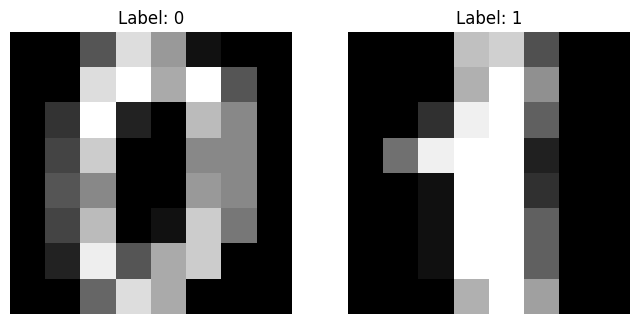

In [3]:
# Veri seti görselleştir
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.show()

In [4]:
# Train-test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model tanımı - Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=150,         # Ağaç sayısı
    learning_rate=0.05,       # Küçük öğrenme oranı
    max_depth=4,              # Ağacın derinliği
    subsample=0.8,            # Her ağacı verinin %80'i ile eğit
    min_samples_split=5,      # Dallanma için gereken min örnek sayısı
    min_samples_leaf=3,       # Yaprakta en az 3 örnek olmalı
    max_features="sqrt",      # Özelliklerin karekökü kadarını kullan
    validation_fraction=0.1,  # %10 validation
    n_iter_no_change=5,       # 5 iterasyon boyunca iyileşme yoksa dur
    random_state=42
)

In [5]:
# Model eğitimi ve tahmin
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

In [6]:
# Model değerlendirme
print(f"GB Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"GB Classification Report: \n{classification_report(y_test, y_pred)}")

GB Accuracy: 0.9740740740740741
GB Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.94      0.96        54
           4       0.98      1.00      0.99        60
           5       0.96      0.97      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.91      0.98      0.94        43
           9       0.96      0.92      0.94        59

    accuracy                           0.97       540
   macro avg       0.97      0.98      0.97       540
weighted avg       0.97      0.97      0.97       540

